# Estimate an integral

In this basic example we are going to evaluate an integral of the form.

$$I_f = \int_{a}^{b}\, f(x)\mathrm{d}{x}$$

with the Fejer & ClenshawCurtis methods.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

Let us define both function to integrate & bounds :

In [2]:
a = -m.pi
b = m.pi
f = ot.SymbolicFunction(['x', 'y'], ['1+cos(x)*sin(y)'])

The FejerAlgorithm class allows evaluating integrals using :
 
  - ClenshawCurtis method (see https://en.wikipedia.org/wiki/Clenshaw–Curtis_quadrature)
  - Fejer type 1 & 2 methods (https://en.wikipedia.org/wiki/Clenshaw–Curtis_quadrature#Fejér_quadrature)

Let us start by using `Fejer type1`

## Fejer type 1

In [3]:
# compute the integral value
algo = ot.FejerAlgorithm([20, 20],  ot.FejerAlgorithm.FEJERTYPE1)
integral, nodes1 = algo.integrateWithNodes(f,ot.Interval([a,a],[b,b]))
print(integral)

[39.4784]


## Fejer type 2

In [4]:
# compute the integral value
algo = ot.FejerAlgorithm([20, 20],  ot.FejerAlgorithm.FEJERTYPE2)
integral, nodes2 = algo.integrateWithNodes(f,ot.Interval([a,a],[b,b]))
print(integral)

[39.4784]


## Clenshaw-Curtis method

In [5]:
# compute the integral value
algo = ot.FejerAlgorithm([20, 20],  ot.FejerAlgorithm.CLENSHAWCURTIS)
integral, nodes3 = algo.integrateWithNodes(f,ot.Interval([a,a],[b,b]))
print(integral)

[39.4784]


### Graphics

We draw here after the iso-functions:

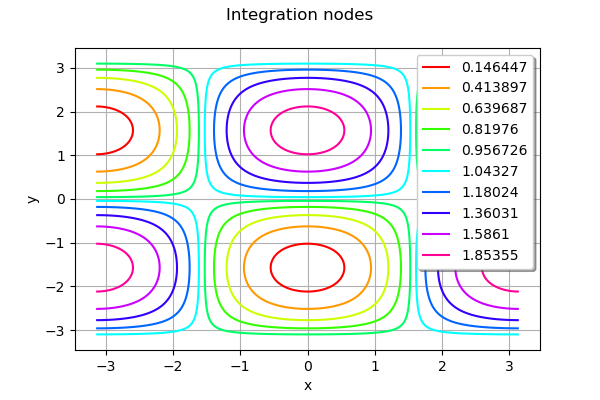

In [6]:
# Draw the graph of the integrand and the bounds
g = ot.Graph('Integration nodes', 'x', 'y', True, 'topright')
g.add(f.draw([a,a],[b,b]))
g

We add nodes used by each method:

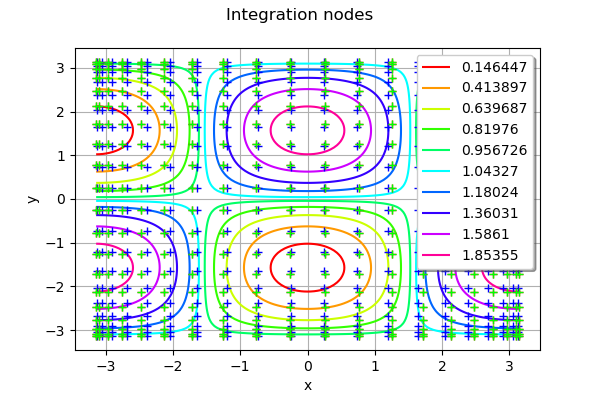

In [7]:
# Fejer type 1
cloud = ot.Cloud(nodes1)
cloud.setColor("blue")
g.add(cloud)
# Fejer 2 nodes
cloud = ot.Cloud(nodes2)
cloud.setColor("red")
g.add(cloud)
# ClenshawCurtis nodes
cloud = ot.Cloud(nodes3)
cloud.setColor("green")
g.add(cloud)
g

We notice a very small difference between the methods. We slightly used similar points